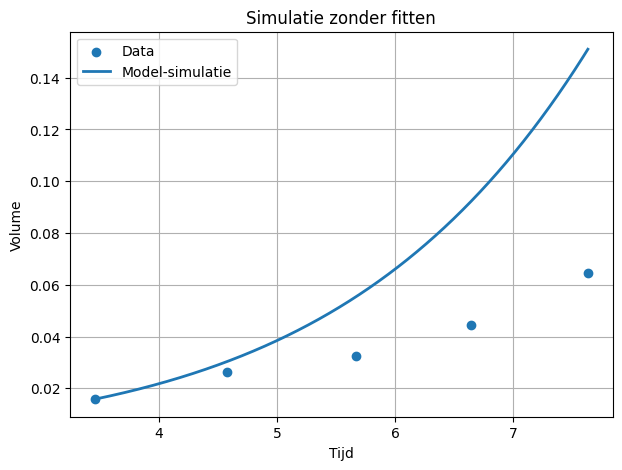

In [12]:
import sys, os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from tumor_models import (
    GompertzPaperModel,
    GompertzLesModel,
    VonBertalanffyModel,
    RungeKutta4Solver,
)

# Jouw dataset
t_data = np.array([3.46, 4.58, 5.67, 6.64, 7.63])
V_data = np.array([0.0158, 0.0264, 0.0326, 0.0445, 0.0646])

# Kies een model
model = GompertzPaperModel(alpha=0.1, beta=0.05)

# Solve ODE zonder fitten
solver = RungeKutta4Solver(n_steps=2000)
ts, Vs = solver.solve(
    f=model.dVdt,
    V0=V_data[0],            # eerste gemeten volume
    t_end=max(t_data) - min(t_data)
)

# tijden opschuiven zodat ze bij de data passen
ts = np.array(ts) + t_data[0]

plt.figure(figsize=(7,5))
plt.scatter(t_data, V_data, label="Data")
plt.plot(ts, Vs, label="Model-simulatie", linewidth=2)
plt.legend()
plt.xlabel("Tijd")
plt.ylabel("Volume")
plt.title("Simulatie zonder fitten")
plt.grid(True)
plt.show()


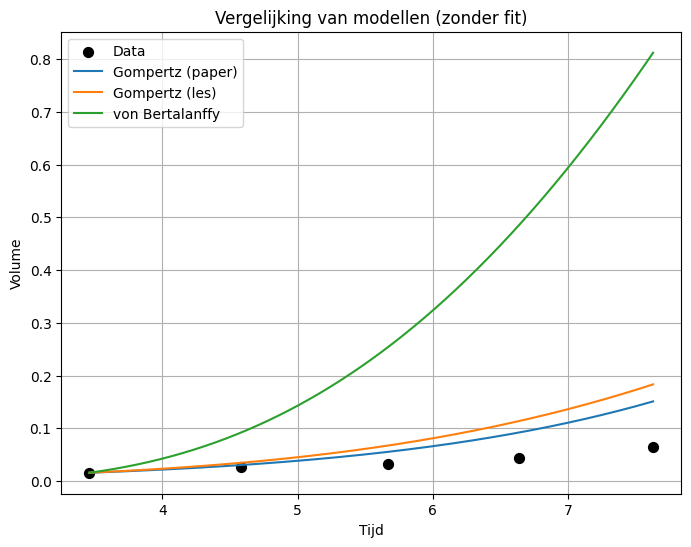

In [13]:
models = {
    "Gompertz (paper)": GompertzPaperModel(alpha=0.1, beta=0.05),
    "Gompertz (les)": GompertzLesModel(c=0.02, cap=8),
    "von Bertalanffy": VonBertalanffyModel(c=0.1, d=0.03),
}

solver = RungeKutta4Solver(n_steps=2000)

plt.figure(figsize=(8,6))
plt.scatter(t_data, V_data, color="black", s=50, label="Data")

for name, model in models.items():
    ts_sim, Vs_sim = solver.solve(model.dVdt, V0=V_data[0], t_end=max(t_data)-min(t_data))
    ts_sim = np.array(ts_sim) + t_data[0]
    plt.plot(ts_sim, Vs_sim, label=name)

plt.xlabel("Tijd")
plt.ylabel("Volume")
plt.title("Vergelijking van modellen (zonder fit)")
plt.grid(True)
plt.legend()
plt.show()

